In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base =  pd.read_csv('PorFechaRegistro.csv')
base

,FECHA,REGISTROS_ACUM,REGISTROS,MEDIA_MOVIL
0,15/04/2020,5847,NaN,NaN
1,16/04/2020,6297,450,NaN
2,17/04/2020,6875,578,NaN
3,18/04/2020,7497,622,NaN
4,19/04/2020,8261,764,NaN
...,...,...,...,...
386,06/05/2021,2358831,2846,2556.714286
387,07/05/2021,2361874,3043,2445.571429
388,08/05/2021,2364617,2743,2405.285714
389,09/05/2021,2365792,1175,2417.000000


In [3]:
base['FECHA'] = pd.to_datetime(base['FECHA'],format='%d/%m/%Y')
base.set_index('FECHA',inplace=True)
base

,REGISTROS_ACUM,REGISTROS,MEDIA_MOVIL
FECHA,,,
2020-04-15,5847,NaN,NaN
2020-04-16,6297,450,NaN
2020-04-17,6875,578,NaN
2020-04-18,7497,622,NaN
2020-04-19,8261,764,NaN
...,...,...,...
2021-05-06,2358831,2846,2556.714286
2021-05-07,2361874,3043,2445.571429
2021-05-08,2364617,2743,2405.285714


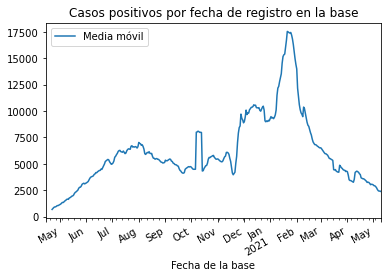

In [4]:
#base['REGISTROS'].plot(label='Registros')
base['MEDIA_MOVIL'].plot(label='Media móvil')
plt.title('Casos positivos por fecha de registro en la base')
plt.xlabel('Fecha de la base')
plt.legend()
plt.gcf().autofmt_xdate()
plt.savefig('Registros.png',bbox_inches='tight', dpi='figure')
plt.show()


In [5]:
from docx import Document
from docx.shared import Cm
from docx.shared import Inches

In [7]:
document = Document()

document.add_heading('Casos por fecha de registro', level=0)

#document.add_heading('Gráficas', level=2)

document.add_picture('Registros.png', width=Inches(5))

document.save('Registros.docx')

In [1]:
import datetime as datetime 
import zipfile

In [3]:
string = datetime.datetime.today().strftime('%y%m%d')
path2 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/Reportes/'+string+'/'
zf = zipfile.ZipFile(path2+string+'COVID19MEXICO.zip') 
base_covid = pd.read_csv(zf.open(string+'COVID19MEXICO.csv'),encoding='latin1',low_memory=True) 

In [4]:
base_covid = base_covid[base_covid['CLASIFICACION_FINAL'].isin([1,2,3])]
base_covid['FECHA_SINTOMAS'] = pd.to_datetime(base_covid['FECHA_SINTOMAS']) #los valores de la columna pasan a ser datetime
base_covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-04-19,z482b8,1,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-04-19,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
8,2021-04-19,z33a15,2,12,12,2,12,12,29,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97
12,2021-04-19,zzcda2,1,12,2,1,2,2,4,1,...,1,2,97,2,97,1,99,MÃ©xico,97,97
14,2021-04-19,z4f06b,1,6,22,2,15,22,14,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97


In [5]:
hoy = datetime.datetime.today()
hoy = hoy.replace(hour=0, minute=0, second=0, microsecond=0)
hoy

datetime.datetime(2021, 4, 19, 0, 0)

In [8]:
con=base_covid.pivot_table(index=['FECHA_SINTOMAS'], aggfunc='size') #contar casos nuevos por dia
con=pd.DataFrame(con) #lo anterior como dataframe
idx=pd.date_range(con.index[0],hoy) #creamos un indice de fechas desde el primer registro hasta hoy
con=con.reindex(idx, fill_value=0) #reindexamos el df para no saltarnos fechas
con_tot=con.cumsum()

In [9]:
con

,0
2020-01-02,4
2020-01-03,4
2020-01-04,1
2020-01-05,3
2020-01-06,2
...,...
2021-04-15,950
2021-04-16,588
2021-04-17,248
2021-04-18,40


In [14]:
con_tot

,0
2020-01-02,4
2020-01-03,8
2020-01-04,9
2020-01-05,12
2020-01-06,14
...,...
2021-04-15,2306034
2021-04-16,2306622
2021-04-17,2306870
2021-04-18,2306910


In [32]:
registros = pd.read_csv('registrosBase.csv')
registros['FECHA'] = pd.to_datetime(registros['FECHA'],format='%d/%m/%Y')

In [38]:
acumulados = registros.set_index('FECHA').join(con_tot)
acumulados = acumulados.rename(columns={'REGISTROS_ACUM':'Por fecha de registros',0:'Por fecha de sintomas'})
acumulados.to_csv('Acumulados.csv')

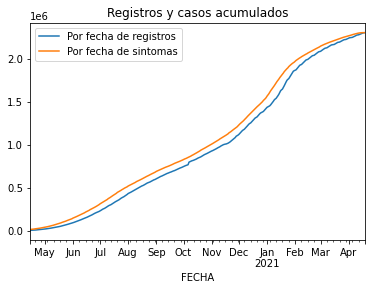

In [70]:
acumulados.plot()
plt.title('Registros y casos acumulados')
plt.savefig('Acumulados.png',bbox_inches='tight', dpi='figure')
plt.show()

In [64]:
diarios = pd.DataFrame(index=acumulados.index[1:])
r = acumulados['Por fecha de registros'].values
diarios['REGISTROS'] = r[1:]-r[:-1]
s = acumulados['Por fecha de sintomas'].values
diarios['SINTOMAS'] = s[1:]-s[:-1]
diarios.to_csv('Diarios.csv')

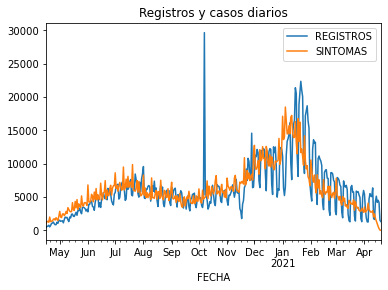

In [71]:
diarios.plot()
plt.title('Registros y casos diarios')
plt.savefig('Diarios.png',bbox_inches='tight', dpi='figure')
plt.show()

In [69]:
from docx import Document
from docx.shared import Cm
from docx.shared import Inches

In [72]:
document = Document()

document.add_heading('Casos por fecha de registro y por fecha de primeros síntomas', level=0)

document.add_picture('Acumulados.png', width=Inches(5))
document.add_picture('Diarios.png', width=Inches(5))


document.save('Casos acumulados y diarios.docx')